<a href="https://colab.research.google.com/github/ChunkaiFu/CSCE636/blob/main/CSCE636HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

What regularization techniques were mentioned in that Jupyter notebook? (5 points)



```
l1, l2, l1_l2, and Dropout appeared in the regulization code blocks. 
```




# Task 2 

The MNIST dataset has 60,000 training images and 10,000 test images. Each image is a 28x28 array, where each array element is between 0 and 255. The images have 10 labels: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9.

We now create a new dataset of 30,000 training images, 5,000 test images and 5 labels (which are 0, 1, 2, 3, 4) as follows. First, randomly pair up the training images of label 0 with the training images of label 1, to get 6,000 such pairs. Then, for each pair (A,B) where A is an image of label 0 and B is an image of label 1, we create a new image of size 28x28, where each element's value is the "average" of the two corresponding pixel values in A and B. (So the new image is a "mixture" of the two original images.) This way we create 6,000 new "mixture" images for training. In a similar way, we create 1,000 new "mixture" images for testing. We give all these 6,000+1,000=7,000 new "mixture" images the new label 0. Then, in the same way, we create 6,000 new training images and 1,000 new test images by mixing the original images of label "2" and "3", and give them the new label 1; create 6,000 new training images and 1,000 new test images by mixing the original images of label "4" and "5", and give them the new label 2; create 6,000 new training images and 1,000 new test images by mixing the original images of label "6" and "7", and give them the new label 3; create 6,000 new training images and 1,000 new test images by mixing the original images of label "8" and "9", and give them the new label 4.    

Your task: submit your code that creates the above new dataset; then for each of the 5 new labels, randomly select 2 images of that label from your new dataset, and display them in your submitted Jupyter notebook. (5 points)


Import the mnist dataset 

In [65]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32")/255 

label_0_train_images = np.array([])
label_1_train_images = np.array([])
label_2_train_images = np.array([])
label_3_train_images = np.array([])
label_4_train_images = np.array([])
label_5_train_images = np.array([])
label_6_train_images = np.array([])
label_7_train_images = np.array([])
label_8_train_images = np.array([])
label_9_train_images = np.array([])

label_0_test_images = np.array([])
label_1_test_images = np.array([])
label_2_test_images = np.array([])
label_3_test_images = np.array([])
label_4_test_images = np.array([])
label_5_test_images = np.array([])
label_6_test_images = np.array([])
label_7_test_images = np.array([])
label_8_test_images = np.array([])
label_9_test_images = np.array([])

# there got to be a more efficient and elegant way to preprocess the data 
for idx, label in enumerate(train_labels): 
  if label == 0: label_0_train_images = np.append(label_0_train_images, train_images[idx])
  elif label == 1: label_1_train_images = np.append(label_1_train_images, train_images[idx])
  elif label == 2: label_2_train_images = np.append(label_2_train_images, train_images[idx])
  elif label == 3: label_3_train_images = np.append(label_3_train_images, train_images[idx])
  elif label == 4: label_4_train_images = np.append(label_4_train_images, train_images[idx])
  elif label == 5: label_5_train_images = np.append(label_5_train_images, train_images[idx])
  elif label == 6: label_6_train_images = np.append(label_6_train_images, train_images[idx])
  elif label == 7: label_7_train_images = np.append(label_7_train_images, train_images[idx])
  elif label == 8: label_8_train_images = np.append(label_8_train_images, train_images[idx])
  elif label == 9: label_9_train_images = np.append(label_9_train_images, train_images[idx])

for idx, label in enumerate(test_labels): 
  if label == 0: label_0_test_images = np.append(label_0_test_images, test_images[idx])
  elif label == 1: label_1_test_images = np.append(label_1_test_images, test_images[idx])
  elif label == 2: label_2_test_images = np.append(label_2_test_images, test_images[idx])
  elif label == 3: label_3_test_images = np.append(label_3_test_images, test_images[idx])
  elif label == 4: label_4_test_images = np.append(label_4_test_images, test_images[idx])
  elif label == 5: label_5_test_images = np.append(label_5_test_images, test_images[idx])
  elif label == 6: label_6_test_images = np.append(label_6_test_images, test_images[idx])
  elif label == 7: label_7_test_images = np.append(label_7_test_images, test_images[idx])
  elif label == 8: label_8_test_images = np.append(label_8_test_images, test_images[idx])
  elif label == 9: label_9_test_images = np.append(label_9_test_images, test_images[idx])

For train_images: Generate the new images by averaging label 0 and 1 element wise 

In [66]:
global_train_pixel_count = np.array([])
min = np.minimum(len(label_0_train_images), len(label_1_train_images)) 
global_train_pixel_count = np.append(global_train_pixel_count, min) 
train_images_label_0_mixed = np.zeros(shape = (min,))
for i in range(0, min, 1): 
  train_images_label_0_mixed[i] = (label_0_train_images[i] + label_1_train_images[i]) * 0.5 

min = np.minimum(len(label_2_train_images), len(label_3_train_images)) 
global_train_pixel_count = np.append(global_train_pixel_count, min) 
train_images_label_1_mixed = np.zeros(shape = (min,))
for i in range(0, min, 1): 
  train_images_label_1_mixed[i] = (label_2_train_images[i] + label_3_train_images[i]) * 0.5 

min = np.minimum(len(label_4_train_images), len(label_5_train_images))
global_train_pixel_count = np.append(global_train_pixel_count, min) 
train_images_label_2_mixed = np.zeros(shape = (min,)) 
for i in range(0, min, 1):
  train_images_label_2_mixed[i] = (label_4_train_images[i] + label_5_train_images[i]) * 0.5 

min = np.minimum(len(label_6_train_images), len(label_7_train_images))
global_train_pixel_count = np.append(global_train_pixel_count, min) 
train_images_label_3_mixed = np.zeros(shape = (min,)) 
for i in range(0, min, 1):
  train_images_label_3_mixed[i] = (label_6_train_images[i] + label_7_train_images[i]) * 0.5 

min = np.minimum(len(label_8_train_images), len(label_9_train_images))
global_train_pixel_count = np.append(global_train_pixel_count, min) 
train_images_label_4_mixed = np.zeros(shape = (min,)) 
for i in range(0, min, 1):
  train_images_label_4_mixed[i]= (label_8_train_images[i] + label_9_train_images[i]) * 0.5 

In [67]:
global_train_pixel_count

array([4643632., 4671072., 4250064., 4639712., 4587184.])

For test_images: generate the new images by averaging the 0 and 1 

In [68]:
global_test_pixel_count = np.array([])
min = np.minimum(len(label_0_test_images), len(label_1_test_images)) 
global_test_pixel_count = np.append(global_test_pixel_count, min) 
test_images_label_0_mixed = np.zeros(shape = (min,))
for i in range(0, min, 1): 
  test_images_label_0_mixed[i] = (label_0_test_images[i] + label_1_test_images[i]) * 0.5 

min = np.minimum(len(label_2_test_images), len(label_3_test_images)) 
global_test_pixel_count = np.append(global_test_pixel_count, min) 
test_images_label_1_mixed = np.zeros(shape = (min,))
for i in range(0, min, 1): 
  test_images_label_1_mixed[i] = (label_2_test_images[i] + label_3_test_images[i]) * 0.5 

min = np.minimum(len(label_4_test_images), len(label_5_test_images))
global_test_pixel_count = np.append(global_test_pixel_count, min) 
test_images_label_2_mixed = np.zeros(shape = (min,)) 
for i in range(0, min, 1):
  test_images_label_2_mixed[i] = (label_4_test_images[i] + label_5_test_images[i]) * 0.5 

min = np.minimum(len(label_6_test_images), len(label_7_test_images))
global_test_pixel_count = np.append(global_test_pixel_count, min) 
test_images_label_3_mixed = np.zeros(shape = (min,)) 
for i in range(0, min, 1):
  test_images_label_3_mixed[i] = (label_6_test_images[i] + label_7_test_images[i]) * 0.5 

min = np.minimum(len(label_8_test_images), len(label_9_test_images))
global_test_pixel_count = np.append(global_test_pixel_count, min) 
test_images_label_4_mixed = np.zeros(shape = (min,)) 
for i in range(0, min, 1):
  test_images_label_4_mixed[i]= (label_8_test_images[i] + label_9_test_images[i]) * 0.5 

In [69]:
print(global_test_pixel_count)

[768320. 791840. 699328. 751072. 763616.]


Reshape the train images for each new label 

In [70]:
train_images_label_0_mixed = np.reshape(train_images_label_0_mixed, (-1, 784))
train_images_label_1_mixed = np.reshape(train_images_label_1_mixed, (-1, 784))
train_images_label_2_mixed = np.reshape(train_images_label_2_mixed, (-1, 784))
train_images_label_3_mixed = np.reshape(train_images_label_3_mixed, (-1, 784))
train_images_label_4_mixed = np.reshape(train_images_label_4_mixed, (-1, 784))
print(train_images_label_0_mixed.shape)
print(train_images_label_1_mixed.shape)
print(train_images_label_2_mixed.shape)
print(train_images_label_3_mixed.shape)
print(train_images_label_4_mixed.shape)

(5923, 784)
(5958, 784)
(5421, 784)
(5918, 784)
(5851, 784)


Reshape the test images for each new label and verify that the dimensions are correct

In [71]:
test_images_label_0_mixed = np.reshape(test_images_label_0_mixed, (-1, 784))
test_images_label_1_mixed = np.reshape(test_images_label_1_mixed, (-1, 784))
test_images_label_2_mixed = np.reshape(test_images_label_2_mixed, (-1, 784))
test_images_label_3_mixed = np.reshape(test_images_label_3_mixed, (-1, 784))
test_images_label_4_mixed = np.reshape(test_images_label_4_mixed, (-1, 784))
print(test_images_label_0_mixed.shape)
print(test_images_label_1_mixed.shape)
print(test_images_label_2_mixed.shape)
print(test_images_label_3_mixed.shape)
print(test_images_label_4_mixed.shape)

(980, 784)
(1010, 784)
(892, 784)
(958, 784)
(974, 784)


Choose two random images from the new train dataset and display them 

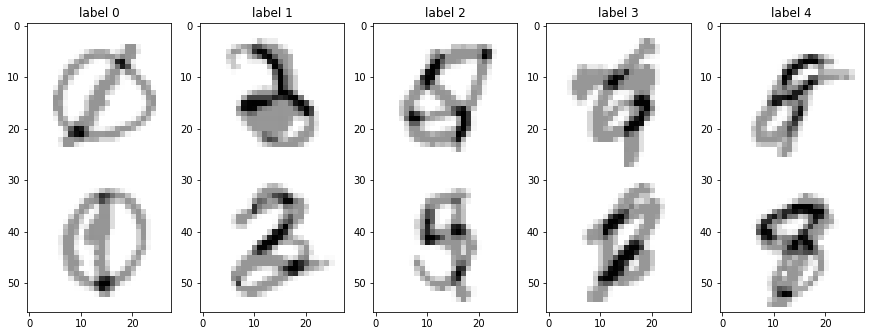

In [72]:
import matplotlib.pyplot as plt
example_images_label_0 = train_images_label_0_mixed[np.random.choice(train_images_label_0_mixed.shape[0], 2)]
example_images_label_0 = np.reshape(example_images_label_0, (28 * 2, 28)) 

example_images_label_1 = train_images_label_1_mixed[np.random.choice(train_images_label_1_mixed.shape[0], 2)]
example_images_label_1 = np.reshape(example_images_label_1, (28 * 2, 28)) 

example_images_label_2 = train_images_label_2_mixed[np.random.choice(train_images_label_2_mixed.shape[0], 2)]
example_images_label_2 = np.reshape(example_images_label_2, (28 * 2, 28)) 

example_images_label_3 = train_images_label_3_mixed[np.random.choice(train_images_label_3_mixed.shape[0], 2)]
example_images_label_3 = np.reshape(example_images_label_3, (28 * 2, 28)) 

example_images_label_4 = train_images_label_4_mixed[np.random.choice(train_images_label_4_mixed.shape[0], 2)]
example_images_label_4 = np.reshape(example_images_label_4, (28 * 2, 28)) 

fig, (axis0, axis1, axis2, axis3, axis4) = plt.subplots(1, 5) 
fig.set_size_inches(15,15)
axis0.imshow(example_images_label_0, cmap = 'Greys')
axis0.title.set_text("label 0")
axis1.imshow(example_images_label_1, cmap = 'Greys')
axis1.title.set_text("label 1")
axis2.imshow(example_images_label_2, cmap = 'Greys')
axis2.title.set_text("label 2")
axis3.imshow(example_images_label_3, cmap = 'Greys')
axis3.title.set_text("label 3")
axis4.imshow(example_images_label_4, cmap = 'Greys')
axis4.title.set_text("label 4")


Display some test images to verify that the images are combined correctly 

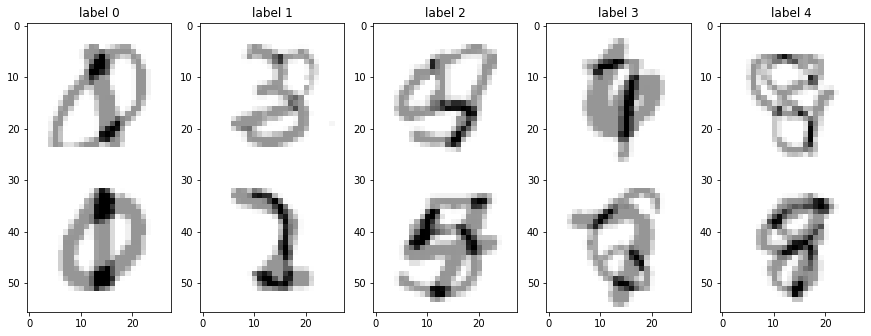

In [73]:
import matplotlib.pyplot as plt
example_test_images_label_0 = test_images_label_0_mixed[np.random.choice(test_images_label_0_mixed.shape[0], 2)]
example_test_images_label_0 = np.reshape(example_test_images_label_0, (28 * 2, 28)) 

example_test_images_label_1 = test_images_label_1_mixed[np.random.choice(test_images_label_1_mixed.shape[0], 2)]
example_test_images_label_1 = np.reshape(example_test_images_label_1, (28 * 2, 28)) 

example_test_images_label_2 = test_images_label_2_mixed[np.random.choice(test_images_label_2_mixed.shape[0], 2)]
example_test_images_label_2 = np.reshape(example_test_images_label_2, (28 * 2, 28)) 

example_test_images_label_3 = test_images_label_3_mixed[np.random.choice(test_images_label_3_mixed.shape[0], 2)]
example_test_images_label_3 = np.reshape(example_test_images_label_3, (28 * 2, 28)) 

example_test_images_label_4 = test_images_label_4_mixed[np.random.choice(test_images_label_4_mixed.shape[0], 2)]
example_test_images_label_4 = np.reshape(example_test_images_label_4, (28 * 2, 28)) 

fig, (axis0, axis1, axis2, axis3, axis4) = plt.subplots(1, 5) 
fig.set_size_inches(15, 15)
axis0.imshow(example_test_images_label_0, cmap = 'Greys')
axis0.title.set_text("label 0")
axis1.imshow(example_test_images_label_1, cmap = 'Greys')
axis1.title.set_text("label 1")
axis2.imshow(example_test_images_label_2, cmap = 'Greys')
axis2.title.set_text("label 2")
axis3.imshow(example_test_images_label_3, cmap = 'Greys')
axis3.title.set_text("label 3")
axis4.imshow(example_test_images_label_4, cmap = 'Greys')
axis4.title.set_text("label 4")

Concatenate the train images for each new set of images and reshape it to the original dimension (column count = 784)

In [74]:
train_images = np.array([])
train_images = np.append(train_images, train_images_label_0_mixed)
train_images = np.append(train_images, train_images_label_1_mixed)
train_images = np.append(train_images, train_images_label_2_mixed)
train_images = np.append(train_images, train_images_label_3_mixed)
train_images = np.append(train_images, train_images_label_4_mixed)
train_images = np.reshape(train_images, (-1, 784))
train_images.shape 

(29071, 784)

Generate a label for each image in train_images 

In [75]:
global_train_image_count = global_train_pixel_count / 784  # an image has 28*28 = 784 pixles 
print(global_train_image_count)

[5923. 5958. 5421. 5918. 5851.]


In [76]:
train_labels = np.array([])
train_labels = np.append(train_labels, np.zeros(shape = 5923))  # these shape values are after after the global image count is available 
train_labels = np.append(train_labels, np.ones(shape = 5958)) 
train_labels = np.append(train_labels, np.full((5421, ), 2))
train_labels = np.append(train_labels, np.full((5918, ), 3))
train_labels = np.append(train_labels, np.full((5851, ), 4))
train_labels.shape 

(29071,)

Concatenate the pixels of all test images for each new label 


In [77]:
test_images = np.array([])
test_images = np.append(test_images, test_images_label_0_mixed)
test_images = np.append(test_images, test_images_label_1_mixed)
test_images = np.append(test_images, test_images_label_2_mixed)
test_images = np.append(test_images, test_images_label_3_mixed)
test_images = np.append(test_images, test_images_label_4_mixed)
test_images = np.reshape(test_images, (-1, 784))
test_images.shape 

(4814, 784)

Generate labels for each image in the test_images 

In [78]:
global_test_image_count = global_test_pixel_count / 784 
print(global_test_image_count)

[ 980. 1010.  892.  958.  974.]


In [79]:
test_labels = np.array([])
test_labels = np.append(test_labels, np.zeros(shape = 980))
test_labels = np.append(test_labels, np.ones(shape = 1010)) 
test_labels = np.append(test_labels, np.full((892, ), 2))
test_labels = np.append(test_labels, np.full((958, ), 3))
test_labels = np.append(test_labels, np.full((974, ), 4))
test_labels.shape 

(4814,)

Shuffle the train_images and test_images with the same random sequence 
The train images and labels are order in ascending order. Very low validation 
accuracy will occur if the data is not shuffled. 

In [80]:
import numpy as np
from sklearn import utils
# train_images and train_labels share a shuffling sequence 
train_images, train_labels = utils.shuffle(train_images, train_labels)
print(train_images)
print(train_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[2. 3. 1. ... 3. 3. 3.]


Data preprocessing results: 

train_images contains all the images for training with the corresponding train_labels. train_iamges has 29071 rows and 784 colums. Each row is an image.
train_labels has 29071 rows and 1 colum, where each row is a label (0 to 4).  

test_images contains all the images for testing with the corresponding test_labels. test_images has 4814 rows and 784 colums. Each row is an image. test_labels has 4814 rows and 1 colum. Each row is a label (0 to 4). 

Values in the train_images and test_images arrays are within [0, 1]. 

# Task 3


Design a neural network model to classify the 5 classes in the new dataset, and optimize it by tuning its hyper-parameters and trying our learned regualization techniques (such as L1 regularization, L2 regularization, dropout). 

Your task: For your final (namely, optimized) neural network model, submit its code, and show the model's performance (including loss value and accuracy) for training, validation and testing. (For training performance and validation performance, illustrate them using figures, where the x-axis is the number of training epochs, and the y-axis is the loss or accuracy. For testing performance, just show the values of loss and accuracy.) Also, answer the questions: in this process of optimizing your model, did you observe underfitting? Did you observe overfitting? Did you try the reguliazation techniques? Did they help? (10 points)

Build the model 

In [81]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

def get_model():
    model = keras.Sequential([
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dropout(0.3), 
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dropout(0.3), 
    layers.Dense(5, activation="softmax")
    ])

    opt = keras.optimizers.RMSprop(learning_rate=0.0001)
    model.compile(optimizer=opt,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
182/182 [==============================] - 4s 21ms/step - loss: 2.4690 - accuracy: 0.8425 - val_loss: 1.7824 - val_accuracy: 0.9486
Epoch 2/20
182/182 [==============================] - 4s 20ms/step - loss: 1.5655 - accuracy: 0.9378 - val_loss: 1.3109 - val_accuracy: 0.9567
Epoch 3/20
182/182 [==============================] - 4s 20ms/step - loss: 1.1898 - accuracy: 0.9478 - val_loss: 1.0343 - val_accuracy: 0.9608
Epoch 4/20
182/182 [==============================] - 4s 20ms/step - loss: 0.9635 - accuracy: 0.9536 - val_loss: 0.8649 - val_accuracy: 0.9618
Epoch 5/20
182/182 [==============================] - 4s 20ms/step - loss: 0.8109 - accuracy: 0.9577 - val_loss: 0.7368 - val_accuracy: 0.9646
Epoch 6/20
182/182 [==============================] - 4s 20ms/step - loss: 0.6948 - accuracy: 0.9596 - val_loss: 0.6336 - val_accuracy: 0.9646
Epoch 7/20
182/182 [==============================] - 4s 20ms/step - loss: 0.6033 - accuracy: 0.9608 - val_loss: 0.5543 - val_accuracy: 0.9658

**Plotting a validation accuracy comparison**

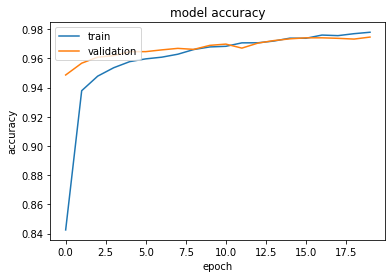

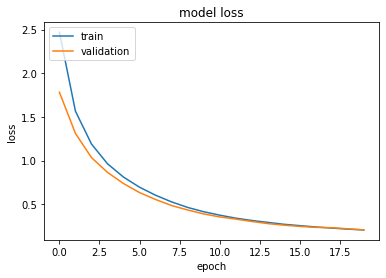

In [82]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


Test the test_images, test_labels data 

In [83]:
results = model.evaluate(test_images, test_labels)

151/151 [==============================] - 1s 4ms/step - loss: 17.1391 - accuracy: 0.9543


In [84]:
results 

[17.13910675048828, 0.9542999863624573]

High loss and high accuracy can be caused by one or a few outliers. The loss function will increase dramatically because of these outliers. But it does not affect the model learn from other images, so the resulting accuracy is still high. 

In [85]:
model.predict(test_images)

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In this process of optimizing your model, did you observe underfitting? Did you observe overfitting? Did you try the reguliazation techniques? Did they help?

No underfitting oberved. Overfitting observed. I tried l2 regulaization and Dropout. Yes they help curb overfitting. One catch is that the data needs to be shuffled before training, otherwise, the training accuracy will be high but the validation accuracy will be very low. 